
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







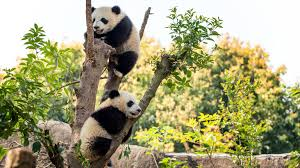


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

sns.set_style("whitegrid")

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [2]:
pca_regional_drug_summary_df = pd.read_csv('BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [3]:
pca_regional_summary_df = pd.read_csv('BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [4]:
df_q1 = pca_regional_drug_summary_df.groupby(by = 'BNF_CHEMICAL_SUBSTANCE', as_index=False)["ITEMS"].sum().sort_values("ITEMS", ascending=False).head(10)
display(df_q1)

,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


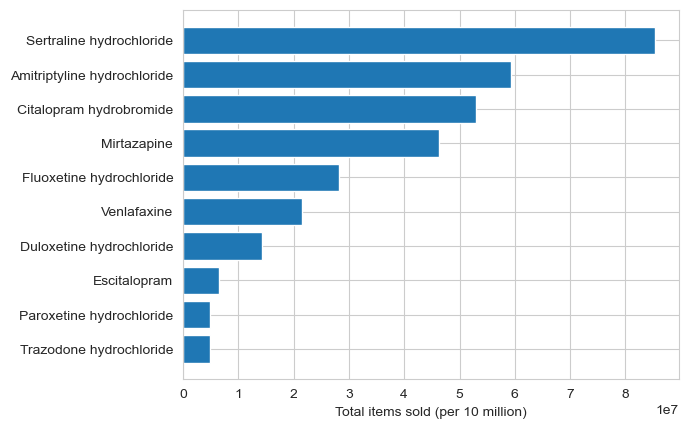

In [5]:
plt.barh(df_q1['BNF_CHEMICAL_SUBSTANCE'], df_q1['ITEMS'])
plt.xlabel('Total items sold (per 10 million)')
plt.gca().invert_yaxis()
plt.show()

### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [6]:
df_q2 = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Mirtazapine"]
df_q2 = df_q2.groupby(by = "YEAR_MONTH", as_index=False)["COST"].sum()
df_q2.head()

,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32


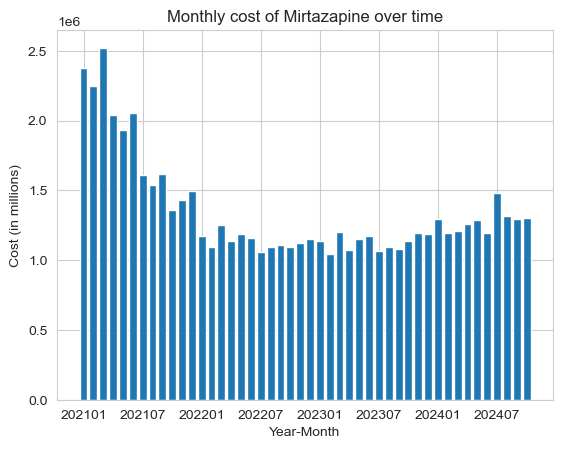

In [7]:
plt.bar(np.arange(len(df_q2)), df_q2["COST"])
plt.xlabel("Year-Month")
plt.xticks(ticks = np.arange(len(df_q2))[::6], labels = df_q2["YEAR_MONTH"].values[::6])
plt.ylabel("Cost (in millions)")
plt.title("Monthly cost of Mirtazapine over time")
plt.show()

### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [8]:
df_q3 = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride"]
df_q3 = df_q3.groupby(by = "YEAR", as_index=False)["COST"].sum()
df_q3.head()

,YEAR,COST
0,2021,91304824.72
1,2022,33495849.17
2,2023,39464970.52
3,2024,41387330.77


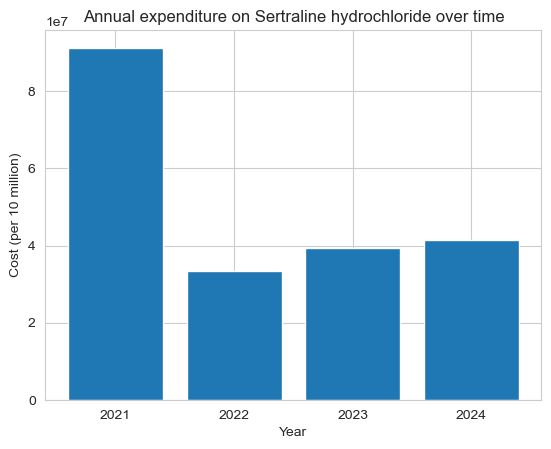

In [9]:
plt.bar(df_q3["YEAR"], df_q3["COST"])
plt.xticks(ticks = df_q3["YEAR"], labels=df_q3["YEAR"])
plt.xlabel("Year")
plt.ylabel("Cost (per 10 million)")
plt.title("Annual expenditure on Sertraline hydrochloride over time")
plt.show()

Note that only data upto October 2024 is taken for the year 2024.

# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

In [10]:
df_2_q1 = pca_regional_drug_summary_df[pca_regional_drug_summary_df["YEAR"] == 2024]
df_2_q1 = df_2_q1.groupby(by = "BNF_CHEMICAL_SUBSTANCE", as_index=False)["ITEMS"].sum().sort_values("ITEMS", ascending=False).head(5)
df_2_q1 = df_2_q1.sort_values("ITEMS", ascending=True)
display(df_2_q1)

,BNF_CHEMICAL_SUBSTANCE,ITEMS
9,Fluoxetine hydrochloride,6273887
16,Mirtazapine,10907989
2,Citalopram hydrobromide,11156770
1,Amitriptyline hydrochloride,13453325
23,Sertraline hydrochloride,20289221


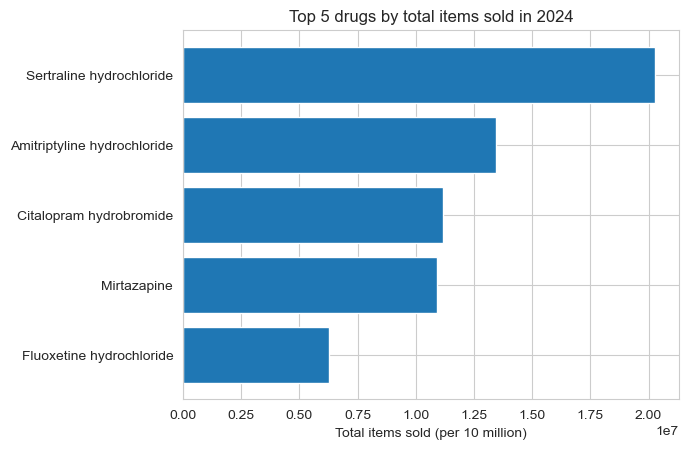

In [11]:
plt.barh(df_2_q1["BNF_CHEMICAL_SUBSTANCE"], df_2_q1["ITEMS"])
plt.xlabel("Total items sold (per 10 million)")
plt.title("Top 5 drugs by total items sold in 2024")
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


In [12]:
df_2_q2 = pca_regional_drug_summary_df[(pca_regional_drug_summary_df["REGION_NAME"] == "NORTH WEST") & (pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride")].groupby(by = "YEAR", as_index=False)["COST"].sum()
display(df_2_q2)

,YEAR,COST
0,2021,13899005.81
1,2022,4858451.61
2,2023,5624860.02
3,2024,5698311.51


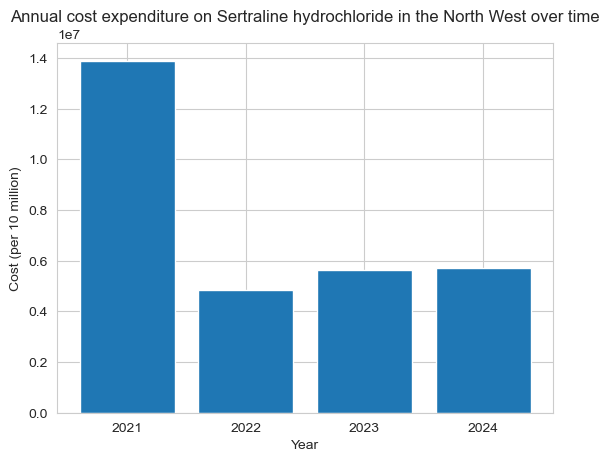

In [13]:
plt.bar(df_2_q2["YEAR"], df_2_q2["COST"])
plt.xticks(ticks = df_2_q2["YEAR"], labels=df_2_q2["YEAR"])
plt.xlabel("Year")
plt.ylabel("Cost (per 10 million)")
plt.title("Annual cost expenditure on Sertraline hydrochloride in the North West over time")
plt.show()

In [14]:
# creating a series of year_months present in the dataset
year_month = np.sort(pca_regional_drug_summary_df.YEAR_MONTH.unique())
year_month

array([202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204,
       202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212,
       202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308,
       202309, 202310, 202311, 202312, 202401, 202402, 202403, 202404,
       202405, 202406, 202407, 202408, 202409, 202410])

Note that the year 2024 only has 10 months, and two months are missing. Therefore, the actual annual expenditure for the year 2024 might be higher than shown above.

One way to estimate the 2024 year expenditure is to assume that the average per month cost of the medicine for 2024 (as estimated over the given 10 months) will remain the same over the entire year. Then, we can multiply this average month cost by 12 to get the annual cost of the medicine for the 2024 year.

In [15]:
avg_cost = df_2_q2["COST"].values[-1]/10
est_cost = avg_cost * 12
print(f"Estimated cost expenditure for Sertraline hydrochloride for the year 2024: {np.round(est_cost, 2)}")

Estimated cost expenditure for Sertraline hydrochloride for the year 2024: 6837973.81


In [16]:
df_2_q2_2 = df_2_q2.copy()
df_2_q2_2.loc[[3], ["COST"]] = est_cost
display(df_2_q2_2)

,YEAR,COST
0,2021,1.389901e+07
1,2022,4.858452e+06
2,2023,5.624860e+06
3,2024,6.837974e+06


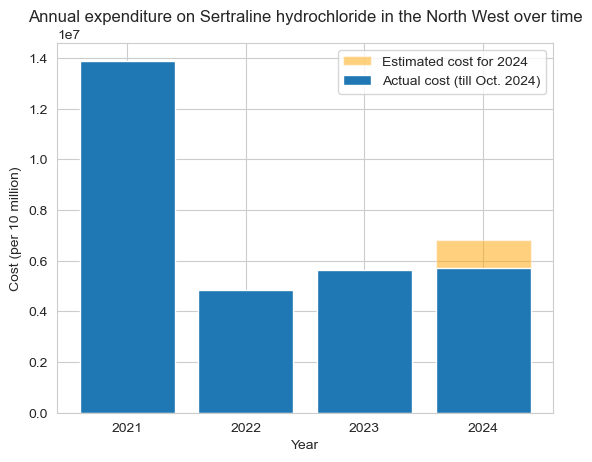

In [17]:
plt.bar(df_2_q2_2["YEAR"], df_2_q2_2["COST"], color = "orange", alpha = 0.5, label = "Estimated cost for 2024")
plt.bar(df_2_q2["YEAR"], df_2_q2["COST"], label = "Actual cost (till Oct. 2024)")
plt.xticks(ticks = df_2_q2_2["YEAR"], labels=df_2_q2_2["YEAR"])
plt.xlabel("Year")
plt.ylabel("Cost (per 10 million)")
plt.title("Annual expenditure on Sertraline hydrochloride in the North West over time")
plt.legend()
plt.show()

The above graph shows the estimated cost for 2024, which better emphasises the increasing trend post 2022 in the expenditure of the medicine.







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

In [18]:
df_2_q3 = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Escitalopram"].groupby(by = "YEAR_MONTH", as_index=False)["COST"].sum().round()
display(df_2_q3.head())

,YEAR_MONTH,COST
0,202101,281379.0
1,202102,265537.0
2,202103,298423.0
3,202104,275776.0
4,202105,266979.0


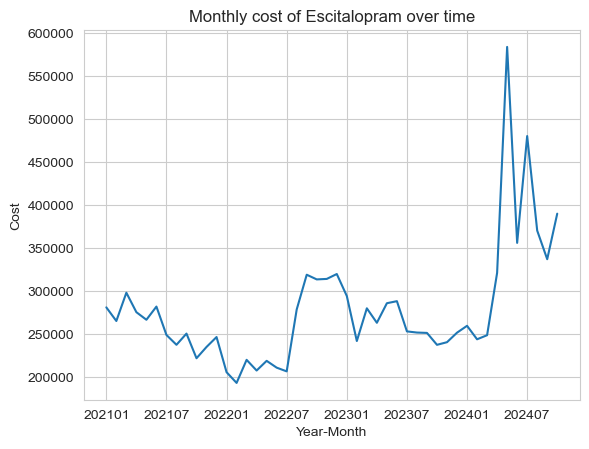

In [19]:
plt.plot(np.arange(len(df_2_q3)), df_2_q3["COST"])
plt.xticks(ticks = np.arange(0, len(df_2_q3))[::6], labels = df_2_q3["YEAR_MONTH"].values[::6])
plt.xlabel("Year-Month")
plt.ylabel("Cost")
plt.title("Monthly cost of Escitalopram over time")
plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

In [20]:
pca_regional_drug_summary_df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [21]:
df_3_q1 = pca_regional_drug_summary_df.groupby(by = "YEAR_MONTH", as_index=False)["COST"].sum()
df_3_q1.head()

,YEAR_MONTH,COST
0,202101,30211076.90
1,202102,28478445.17
2,202103,31933609.64
3,202104,24695554.55
4,202105,23672108.18


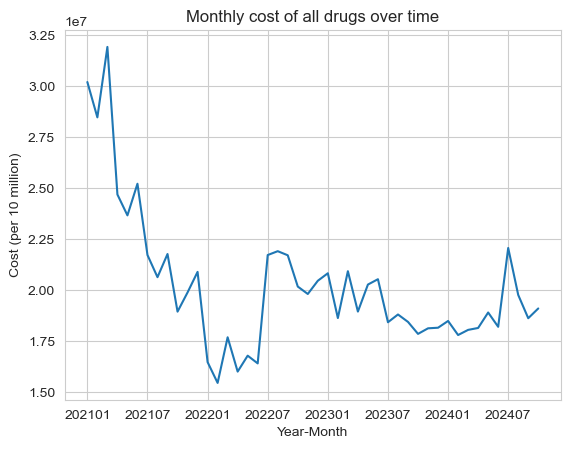

In [22]:
plt.plot(np.arange(len(df_3_q1)), df_3_q1["COST"])
plt.xticks(ticks = np.arange(0, len(df_3_q1))[::6], labels = df_3_q1["YEAR_MONTH"].values[::6])
plt.xlabel("Year-Month")
plt.ylabel("Cost (per 10 million)")
plt.title("Monthly cost of all drugs over time")
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [23]:
years = pca_regional_drug_summary_df["YEAR"].unique()
years = np.sort(years)
years

array([2021, 2022, 2023, 2024])

In [24]:
stat_dict = {}
for year in years:
    df_x = pca_regional_drug_summary_df[pca_regional_drug_summary_df["YEAR"] == year]
    df_x = df_x.groupby(by = "YEAR_MONTH", as_index=False)["COST"].sum()
    print(f"For year {year}:")
    min_cost = df_x["COST"].min()
    print(f"    Minimum cost: {min_cost}")
    q1_cost = df_x["COST"].quantile(0.25)
    print(f"    Q1 cost: {q1_cost}")
    median_cost = df_x["COST"].median()
    print(f"    Median cost: {median_cost}")
    q3_cost = df_x["COST"].quantile(0.75)
    print(f"    Q3 cost: {q3_cost}")
    max_cost = df_x["COST"].max()
    print(f"    Maximum cost: {max_cost}")
    stat_dict[year] = [min_cost, q1_cost, median_cost, q3_cost, max_cost]

For year 2021:
    Minimum cost: 18949756.25
    Q1 cost: 20835485.0625
    Median cost: 22724239.54
    Q3 cost: 26036579.7275
    Maximum cost: 31933609.64
For year 2022:
    Minimum cost: 15453991.47
    Q1 cost: 16458372.8425
    Median cost: 18754196.950000003
    Q3 cost: 20776869.8525
    Maximum cost: 21914896.72
For year 2023:
    Minimum cost: 17859075.18
    Q1 cost: 18362788.4525
    Median cost: 18722910.305
    Q3 cost: 20344159.9175
    Maximum cost: 20934041.830000002
For year 2024:
    Minimum cost: 17802904.89
    Q1 cost: 18163828.4825
    Median cost: 18560027.0
    Q3 cost: 19056283.625
    Maximum cost: 22071625.09



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

In [25]:
ann_stats = {}
for year in years:
    df_x = pca_regional_drug_summary_df[pca_regional_drug_summary_df["YEAR"] == year]
    df_x = df_x.groupby(by = "YEAR_MONTH", as_index=False)["COST"].sum()
    ann_stats[year] = df_x["COST"]

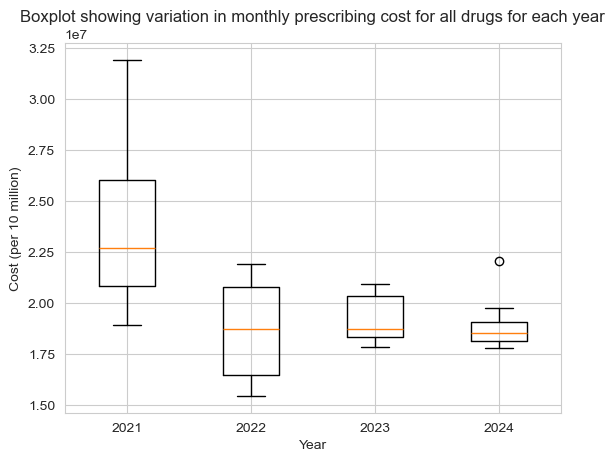

In [26]:
plt.boxplot(ann_stats.values(), tick_labels = ann_stats.keys())
plt.xlabel("Year")
plt.ylabel("Cost (per 10 million)")
plt.title("Boxplot showing variation in monthly prescribing cost for all drugs for each year")
plt.show()

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

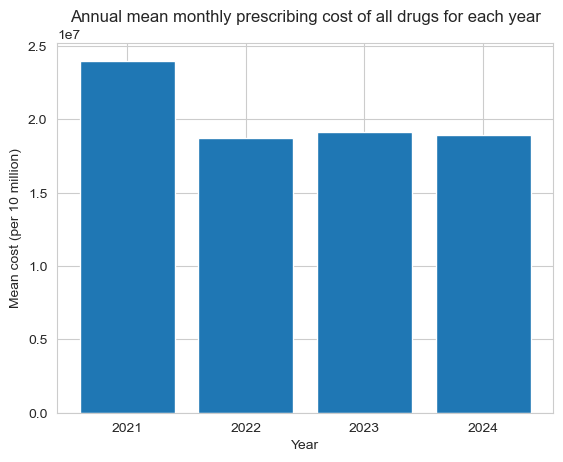

In [27]:
ann_mean = [(year, x.mean()) for (year, x) in (ann_stats.items())]
plt.bar(np.arange(len(ann_mean)), [y for (x, y) in ann_mean])
plt.xticks(ticks = np.arange(len(ann_mean)), labels = [x for (x, y) in ann_mean])
plt.xlabel("Year")
plt.ylabel("Mean cost (per 10 million)")
plt.title("Annual mean monthly prescribing cost of all drugs for each year")
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [28]:
df_x = pca_regional_drug_summary_df.pivot_table(index = "YEAR", columns = "REGION_NAME", values = "COST", aggfunc = "sum")
display(df_x)

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: This will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

#### 1.1 Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

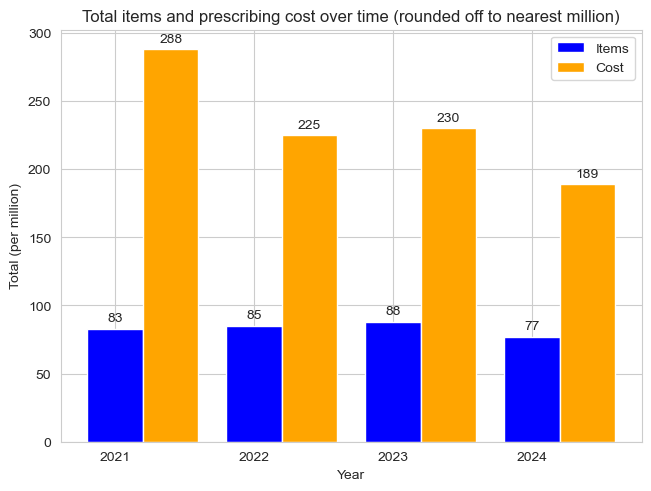

In [29]:
df_items = pca_regional_drug_summary_df.groupby(by = "YEAR", as_index=False)["ITEMS"].sum()
df_items["ITEMS"] = np.round(df_items["ITEMS"]/10**6,0)
df_cost = pca_regional_drug_summary_df.groupby(by = "YEAR", as_index=False)["COST"].sum()
df_cost["COST"] = np.round(df_cost["COST"]/10**6,0)
fig, ax = plt.subplots(layout = "constrained")
r = ax.bar(np.arange(len(df_items)), df_items["ITEMS"], color = "blue", label = "Items", width = 0.4)
ax.bar_label(r, padding=3)
r = ax.bar(np.arange(len(df_cost)) + 0.4, df_cost["COST"], color = "orange", label = "Cost", width = 0.4)
ax.bar_label(r, padding=3)
plt.xticks(ticks = np.arange(len(df_items)), labels = df_items["YEAR"])
plt.xlabel("Year")
plt.ylabel("Total (per million)")
plt.title("Total items and prescribing cost over time (rounded off to nearest million)")
plt.legend()
plt.show()

Since we only have 10 months worth of data for 2024, it is not fair to compare it to other years directly. To make the comparison fare, lets find the mean no. of items and mean cost per month for 2024 and multiply it by 12 to approximate the items and cost consumption for the entire year.

In [30]:
df_items.loc[[3], ["ITEMS"]] = np.round(df_items.loc[[3], ["ITEMS"]]/10*12, 0)
df_cost.loc[[3], ["COST"]] = np.round(df_cost.loc[[3], ["COST"]]/10*12, 0)

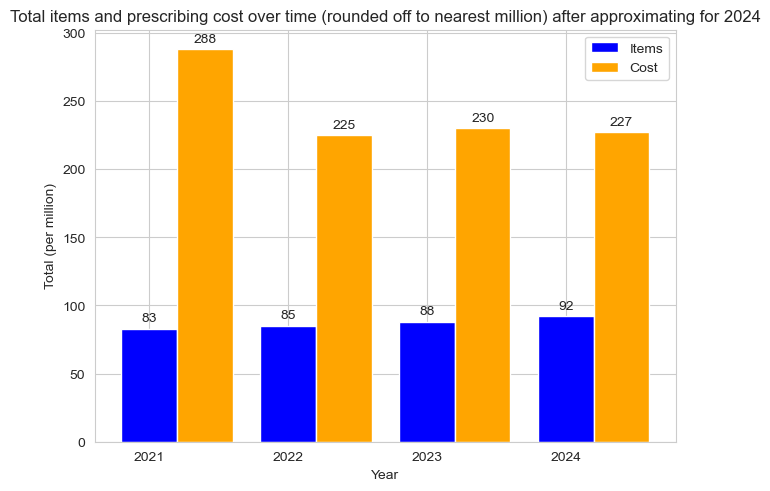

In [31]:
fig, ax = plt.subplots(layout = "constrained")
r = ax.bar(np.arange(len(df_items)), df_items["ITEMS"], color = "blue", label = "Items", width = 0.4)
ax.bar_label(r, padding=3)
r = ax.bar(np.arange(len(df_cost)) + 0.4, df_cost["COST"], color = "orange", label = "Cost", width = 0.4)
ax.bar_label(r, padding=3)
plt.xticks(ticks = np.arange(len(df_items)), labels = df_items["YEAR"])
plt.xlabel("Year")
plt.ylabel("Total (per million)")
plt.title("Total items and prescribing cost over time (rounded off to nearest million) after approximating for 2024")
plt.legend()
plt.show()

From the above chart, we can say that the the total cost is on a decreasing trend from 2021 onwards. The number of items have a slight increasing trend based on the above data. The reason for increase in number of medicines being sold can be due to various reasons, and needs further analysis. One possible reason could be that mental health awareness is increasing, which is leading to more people seeking mental help, which is causing more prescriptions, thus leading to more antidepressant drugs being sold. To confirm this observation, we might want to look at average number of anti-depressant drugs being prescribed per prescription.

Also, from the above graph, we can approximately say that the average price of medicine per item is declining. Let's confirm this observation with another visualisation:

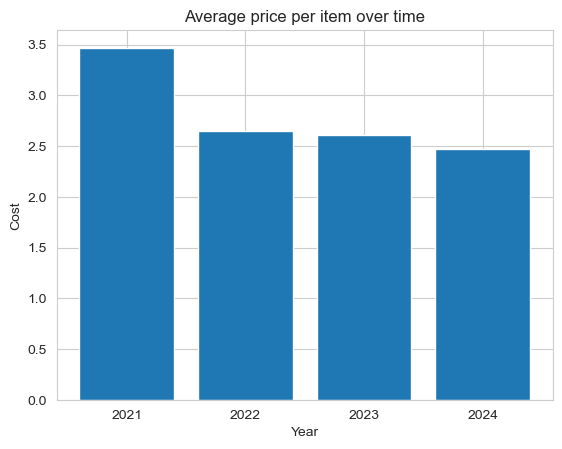

In [32]:
df_price_per_item = df_cost.copy()
df_price_per_item["COST"] = df_cost["COST"]/df_items["ITEMS"]
plt.bar(np.arange(len(df_price_per_item)), df_price_per_item["COST"])
plt.xticks(ticks = np.arange(len(df_price_per_item)), labels = df_price_per_item["YEAR"])
plt.xlabel("Year")
plt.ylabel("Cost")
plt.title("Average price per item over time")
plt.show()

The above observation is confirmed by this barchart which shows that average price per item has been declining over the past 4 years. This is a good stat to see, showing that the price of medicine is not increasing over time, thus making sure that the medicine is affordable.

Two possible reasons for this can be:
1. The average price of anti-depressants has decreased over time (which we will see later is the correct reason).
2. Assuming the prices of the anti-depressant drugs are not changing much, the reason for this trend can be that the prescription of cheaper anti-depressants has increased more proprotion-wise as compared to the prescription of costlier anti-depressants.

#### 1.2  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

In [33]:
df_region_items = pca_regional_drug_summary_df.pivot_table(index = "YEAR", columns = "REGION_NAME", values = "ITEMS", aggfunc = "sum")
display(df_region_items)

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9663288,8599587,15375576,17676819,12417071,10596746,8291455
2022,9887496,9255871,16066881,18255050,12779874,10804393,8355297
2023,10167005,9758068,16751001,19026635,13210529,11045891,8510674
2024,8713529,8282759,14476095,17131959,11378542,9420102,7179388


The above table shows the total annual antidepressant prescribing per region (items). To analyse the changes between the years 2021 and 2024, we create a separate table and visualisation to make the comparison easier.

,2021,2024,diff
REGION_NAME,,,
EAST OF ENGLAND,9663288,8713529,949759
LONDON,8599587,8282759,316828
MIDLANDS,15375576,14476095,899481
NORTH EAST AND YORKSHIRE,17676819,17131959,544860
NORTH WEST,12417071,11378542,1038529
SOUTH EAST,10596746,9420102,1176644
SOUTH WEST,8291455,7179388,1112067


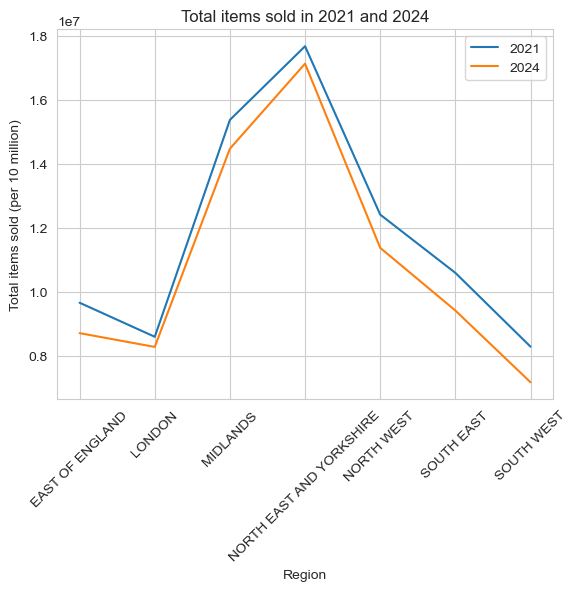

In [34]:
# comparing total items sold in 2021 and 2024
df_region_items_2021 = df_region_items.loc[[2021]]
df_region_items_2024 = df_region_items.loc[[2024]]
df_region_items_comp = pd.DataFrame(index=df_region_items_2021.columns, columns = ["2021", "2024"])
df_region_items_comp["2021"] = df_region_items_2021.values[0]
df_region_items_comp["2024"] = df_region_items_2024.values[0]
df_region_items_comp["diff"] = - df_region_items_comp["2024"] + df_region_items_comp["2021"]
display(df_region_items_comp)

plt.plot(np.arange(len(df_region_items_comp)), df_region_items_comp["2021"], label = "2021")
plt.plot(np.arange(len(df_region_items_comp)), df_region_items_comp["2024"], label = "2024")
# plt.plot(np.arange(len(df_region_items_comp)), df_region_items_comp["diff"], label = "Difference")
plt.xticks(ticks = np.arange(len(df_region_items_comp)), labels = df_region_items_comp.index, rotation = 45)
plt.xlabel("Region")
plt.ylabel("Total items sold (per 10 million)")
plt.title("Total items sold in 2021 and 2024")
plt.legend()
plt.show()

The above chart shows the trends of total annual antidepressant items sold during 2021 and 2024. We can make the following observations from it:

1. All regions have experienced a decrease in the number of items sold.
2. The lowest number of antidepressents sold in 2021 were in the South West region, which is also true for 2024.
3. The highest number of antidepressents sold in 2021 were in the North East and Yorkshire region, which is also true for 2024.
4. The largest decrease in the number of items sold is in South East region, and the smallest decrease is in the London region.

In [35]:
df_region_cost = pca_regional_drug_summary_df.pivot_table(index = "YEAR", columns = "REGION_NAME", values = "COST", aggfunc = "sum")
display(df_region_cost)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


,2021,2024,diff
REGION_NAME,,,
EAST OF ENGLAND,32549420.30,21556935.59,10992484.71
LONDON,31640433.44,21338156.62,10302276.82
MIDLANDS,54008266.51,36140498.75,17867767.76
NORTH EAST AND YORKSHIRE,54219524.21,36540048.99,17679475.22
NORTH WEST,41951035.20,26356567.72,15594467.48
SOUTH EAST,44230470.23,28686310.67,15544159.56
SOUTH WEST,29500099.95,18570411.15,10929688.80


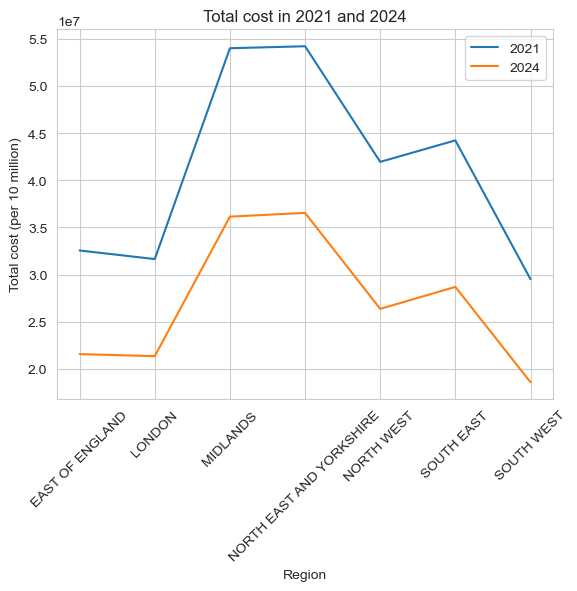

In [36]:
# comparing cost of medication in  2021 and 2024
df_region_cost_2021 = df_region_cost.loc[[2021]]
df_region_cost_2024 = df_region_cost.loc[[2024]]
df_region_cost_comp = pd.DataFrame(index=df_region_cost_2021.columns, columns = ["2021", "2024"])
df_region_cost_comp["2021"] = df_region_cost_2021.values[0]
df_region_cost_comp["2024"] = df_region_cost_2024.values[0]
df_region_cost_comp["diff"] = - df_region_cost_comp["2024"] + df_region_cost_comp["2021"]
display(df_region_cost_comp)

plt.plot(np.arange(len(df_region_cost_comp)), df_region_cost_comp["2021"], label = "2021")
plt.plot(np.arange(len(df_region_cost_comp)), df_region_cost_comp["2024"], label = "2024")
plt.xticks(ticks = np.arange(len(df_region_cost_comp)), labels = df_region_cost_comp.index, rotation = 45)
plt.xlabel("Region")
plt.ylabel("Total cost (per 10 million)")
plt.title("Total cost in 2021 and 2024")
plt.legend()
plt.show()

The above chart shows the trends of total annual antidepressant cost during 2021 and 2024. We can make the following observations from it:

1. All regions have experienced a decrease in the total prescription cost.
2. The lowest cost associated with selling antidepressents in 2021 were in the South West region, which is also true for 2024.
3. The highest cost associated with selling antidepressents in 2021 were in the North East and Yorkshire region, which is also true for 2024.
4. The largest decrease in the cost of antidepressants sold is in the Midlands region, and the smallest decrease is in the London region.

Both sets of observations for cost and items sold closely align with each other.

### 1.3 
    By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart] showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart] that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

In [37]:
pca_regional_drug_summary_df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [38]:
df_items = pca_regional_drug_summary_df.groupby(by = "BNF_CHEMICAL_SUBSTANCE", as_index=False)["ITEMS"].sum()
df_cost = pca_regional_drug_summary_df.groupby(by = "BNF_CHEMICAL_SUBSTANCE", as_index=False)["COST"].sum()
df_items = df_items.sort_values("ITEMS", ascending=False)
df_cost = df_cost.sort_values("COST", ascending=False)

top_10_drugs_items = df_items.BNF_CHEMICAL_SUBSTANCE.head(10).values  # storing the top 10 drugs by items
top_10_drugs_cost = df_cost.BNF_CHEMICAL_SUBSTANCE.head(10).values   # storing the top 10 drugs by cost

df_items.head()

,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759


In [39]:
df_cost.head()

,BNF_CHEMICAL_SUBSTANCE,COST
25,Sertraline hydrochloride,2.056530e+08
30,Venlafaxine,1.503813e+08
1,Amitriptyline hydrochloride,9.273951e+07
10,Fluoxetine hydrochloride,8.143143e+07
3,Citalopram hydrobromide,7.522518e+07


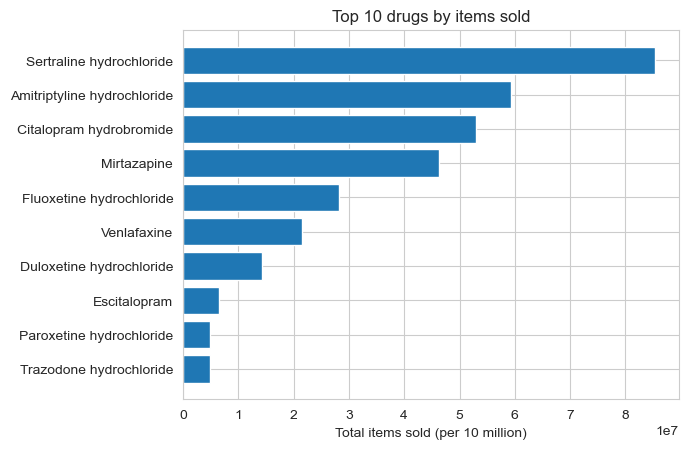

In [40]:
plt.barh(df_items["BNF_CHEMICAL_SUBSTANCE"].head(10), df_items["ITEMS"].head(10))
plt.xlabel("Total items sold (per 10 million)")
plt.title("Top 10 drugs by items sold")
plt.gca().invert_yaxis()
plt.show()

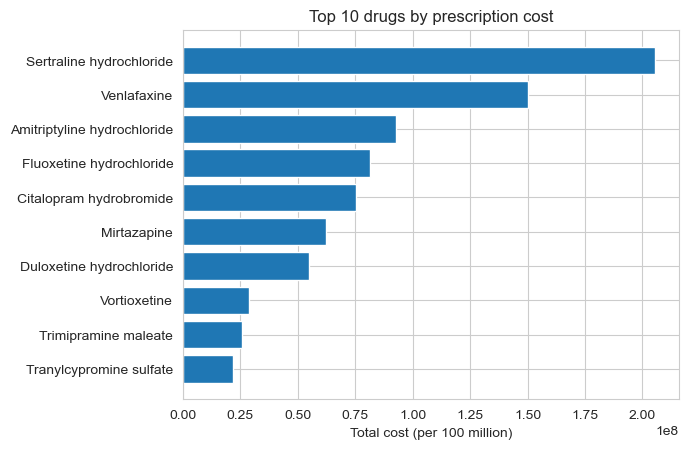

In [41]:
plt.barh(df_cost["BNF_CHEMICAL_SUBSTANCE"].head(10), df_cost["COST"].head(10))
plt.xlabel("Total cost (per 100 million)")
plt.title("Top 10 drugs by prescription cost")
plt.gca().invert_yaxis()
plt.show()

From the above two barcharts, we can make the following observations:

1. Sertraline hydrochloride	is the most selling drug item-wise as well as cost-wise. It's ahead of the drug at second-place by around 30% in terms of both items sold and prescribing cost.

2. Venlafaxine is at the second place in terms of prescribing cost but its not in the top-10 drugs sold item-wise. This suggests that it must be a costly drug. Similarly, other drugs which are present in the top-10 cost wise list but not present in the top-10 item wise list indicate that these drugs must be costly.

Let's analyse the price trends of these drugs over time

In [42]:
drugs = pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"].unique()
drugs


array(['Agomelatine', 'Amitriptyline hydrochloride',
       'Citalopram hydrobromide', 'Citalopram hydrochloride',
       'Clomipramine hydrochloride', 'Dosulepin hydrochloride', 'Doxepin',
       'Duloxetine hydrochloride', 'Escitalopram',
       'Fluoxetine hydrochloride', 'Flupentixol hydrochloride',
       'Fluvoxamine maleate', 'Imipramine hydrochloride', 'Isocarboxazid',
       'Lofepramine hydrochloride', 'Mianserin hydrochloride',
       'Mirtazapine', 'Moclobemide', 'Nefazodone hydrochloride',
       'Nortriptyline', 'Oxitriptan', 'Paroxetine hydrochloride',
       'Phenelzine sulfate', 'Reboxetine', 'Sertraline hydrochloride',
       'Tranylcypromine sulfate', 'Trazodone hydrochloride',
       'Trimipramine maleate', 'Tryptophan', 'Venlafaxine',
       'Vortioxetine', 'Amoxapine'], dtype=object)

In [43]:
df_cost_per_item = pca_regional_drug_summary_df.copy()
drug_cpi = {} # drug-wise cost per item over months
for drug in drugs:
    df_x = df_cost_per_item[df_cost_per_item["BNF_CHEMICAL_SUBSTANCE"] == drug]
    df_x_cost = df_x.groupby(by = "YEAR_MONTH", as_index=False)["COST"].sum()
    df_x_items = df_x.groupby(by = "YEAR_MONTH", as_index=False)["ITEMS"].sum()
    df_x = df_x_cost.merge(df_x_items, on = "YEAR_MONTH")
    df_x["CPI"] = df_x["COST"]/df_x["ITEMS"]
    df_x = df_x.sort_values("YEAR_MONTH", ascending=True)
    drug_cpi[drug] = df_x["CPI"]

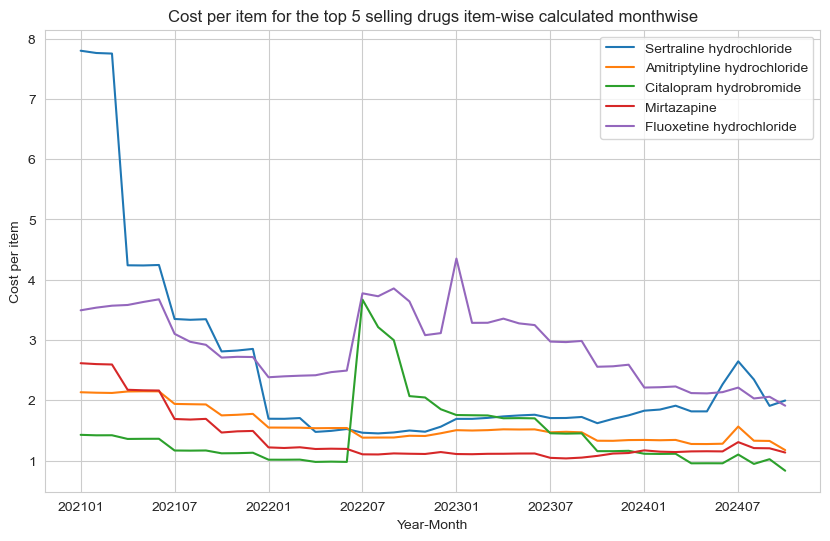

In [44]:
# Analysing the cost per item for the top 5 drugs sold item-wise

plt.figure(figsize=(10,6))
for drug in top_10_drugs_items[:5]:
    plt.plot(np.arange(len(drug_cpi[drug])), drug_cpi[drug], label = drug)
plt.xlabel("Year-Month")
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.ylabel("Cost per item")
plt.title("Cost per item for the top 5 selling drugs item-wise calculated monthwise")
plt.legend()
plt.show()



From this, we can see that there is a clear decreasing trend in the cost per item of top-5 most selling drugs overtime. This decrease has been the most prominent from Jan 2021 to Jan 2022. This decrease is a major reason for the decrease in average cost per drug item over-time, which we observed earlier.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


In [45]:
# creating dataframe to analyse the cost and item sold of drugs over the months
df_cost_monthwise = pca_regional_drug_summary_df.pivot_table(columns = "BNF_CHEMICAL_SUBSTANCE", index="YEAR_MONTH", values="COST", aggfunc = sum)
df_items_monthwise = pca_regional_drug_summary_df.pivot_table(columns = "BNF_CHEMICAL_SUBSTANCE", index="YEAR_MONTH", values="ITEMS", aggfunc = sum)
display(df_cost_monthwise.head())
display(df_items_monthwise.head())

/var/folders/kc/21_s74b16zb4sw3qkmrlmhlc0000gn/T/ipykernel_46279/1501802052.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_cost_monthwise = pca_regional_drug_summary_df.pivot_table(columns = "BNF_CHEMICAL_SUBSTANCE", index="YEAR_MONTH", values="COST", aggfunc = sum)
/var/folders/kc/21_s74b16zb4sw3qkmrlmhlc0000gn/T/ipykernel_46279/1501802052.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_items_monthwise = pca_regional_drug_summary_df.pivot_table(columns = "BNF_CHEMICAL_SUBSTANCE", index="YEAR_MONTH", values="ITEMS", aggfunc = sum)


BNF_CHEMICAL_SUBSTANCE,Agomelatine,Amitriptyline hydrochloride,Amoxapine,Citalopram hydrobromide,Citalopram hydrochloride,Clomipramine hydrochloride,Dosulepin hydrochloride,Doxepin,Duloxetine hydrochloride,Escitalopram,...,Paroxetine hydrochloride,Phenelzine sulfate,Reboxetine,Sertraline hydrochloride,Tranylcypromine sulfate,Trazodone hydrochloride,Trimipramine maleate,Tryptophan,Venlafaxine,Vortioxetine
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,
202101,86389.03,2601843.31,NaN,1680282.86,88524.10,168561.89,514167.67,341033.50,1009354.35,281378.90,...,373380.53,153366.76,32214.56,12639289.40,433485.73,443548.68,708755.38,6960.78,2894500.59,429057.09
202102,80214.92,2453387.50,NaN,1563193.23,81148.86,159844.30,478407.56,330148.82,922291.52,265536.80,...,350146.65,168624.01,29881.18,11883267.56,405956.36,425809.55,685055.00,7167.46,2734571.18,410072.85
202103,89737.07,2755941.49,NaN,1749522.42,90361.49,176271.72,532579.80,364008.67,857248.27,298422.99,...,389888.28,170373.44,33464.01,13455922.57,531050.66,472129.06,741940.32,7083.14,3092829.23,468315.54
202104,77605.49,2689935.77,NaN,1618156.08,91396.36,175309.72,531267.65,357246.62,1139209.89,275776.28,...,384474.64,185686.53,33020.70,7118069.48,446985.12,451007.97,708860.48,5439.38,2879689.57,461077.65
202105,74272.69,2566573.66,183.68,1548270.69,87981.20,168239.76,502653.99,328634.68,1096275.68,266978.81,...,367232.76,159498.01,32021.59,6849723.97,477907.23,418855.65,664181.42,9229.36,2744293.33,450017.37


BNF_CHEMICAL_SUBSTANCE,Agomelatine,Amitriptyline hydrochloride,Amoxapine,Citalopram hydrobromide,Citalopram hydrochloride,Clomipramine hydrochloride,Dosulepin hydrochloride,Doxepin,Duloxetine hydrochloride,Escitalopram,...,Paroxetine hydrochloride,Phenelzine sulfate,Reboxetine,Sertraline hydrochloride,Tranylcypromine sulfate,Trazodone hydrochloride,Trimipramine maleate,Tryptophan,Venlafaxine,Vortioxetine
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,
202101,2075.0,1219610.0,NaN,1177855.0,5496.0,18704.0,37914.0,1730.0,250721.0,119742.0,...,106611.0,350.0,1884.0,1620265.0,451.0,100048.0,1814.0,100.0,423858.0,18622.0
202102,1972.0,1154171.0,NaN,1101852.0,5068.0,17804.0,35454.0,1638.0,239818.0,113409.0,...,99903.0,315.0,1808.0,1530749.0,369.0,95087.0,1724.0,80.0,401372.0,17827.0
202103,2220.0,1299017.0,NaN,1232369.0,5640.0,19718.0,39248.0,1812.0,269243.0,127918.0,...,111697.0,377.0,2000.0,1735443.0,490.0,106467.0,1890.0,90.0,447057.0,20557.0
202104,2132.0,1253506.0,NaN,1191146.0,5487.0,19329.0,37654.0,1716.0,262863.0,125194.0,...,108327.0,372.0,1970.0,1678799.0,431.0,102750.0,1823.0,81.0,435432.0,20218.0
202105,2124.0,1194095.0,1.0,1137869.0,5258.0,18299.0,35369.0,1621.0,252825.0,120913.0,...,103220.0,315.0,1891.0,1616528.0,408.0,98242.0,1715.0,105.0,415888.0,19515.0


In [46]:
# imputing the nan values to zero
df_cost_monthwise.fillna(0, inplace=True)
df_items_monthwise.fillna(0, inplace=True)

Creating an average drug price chart to compare the average price of each anti-depressant 

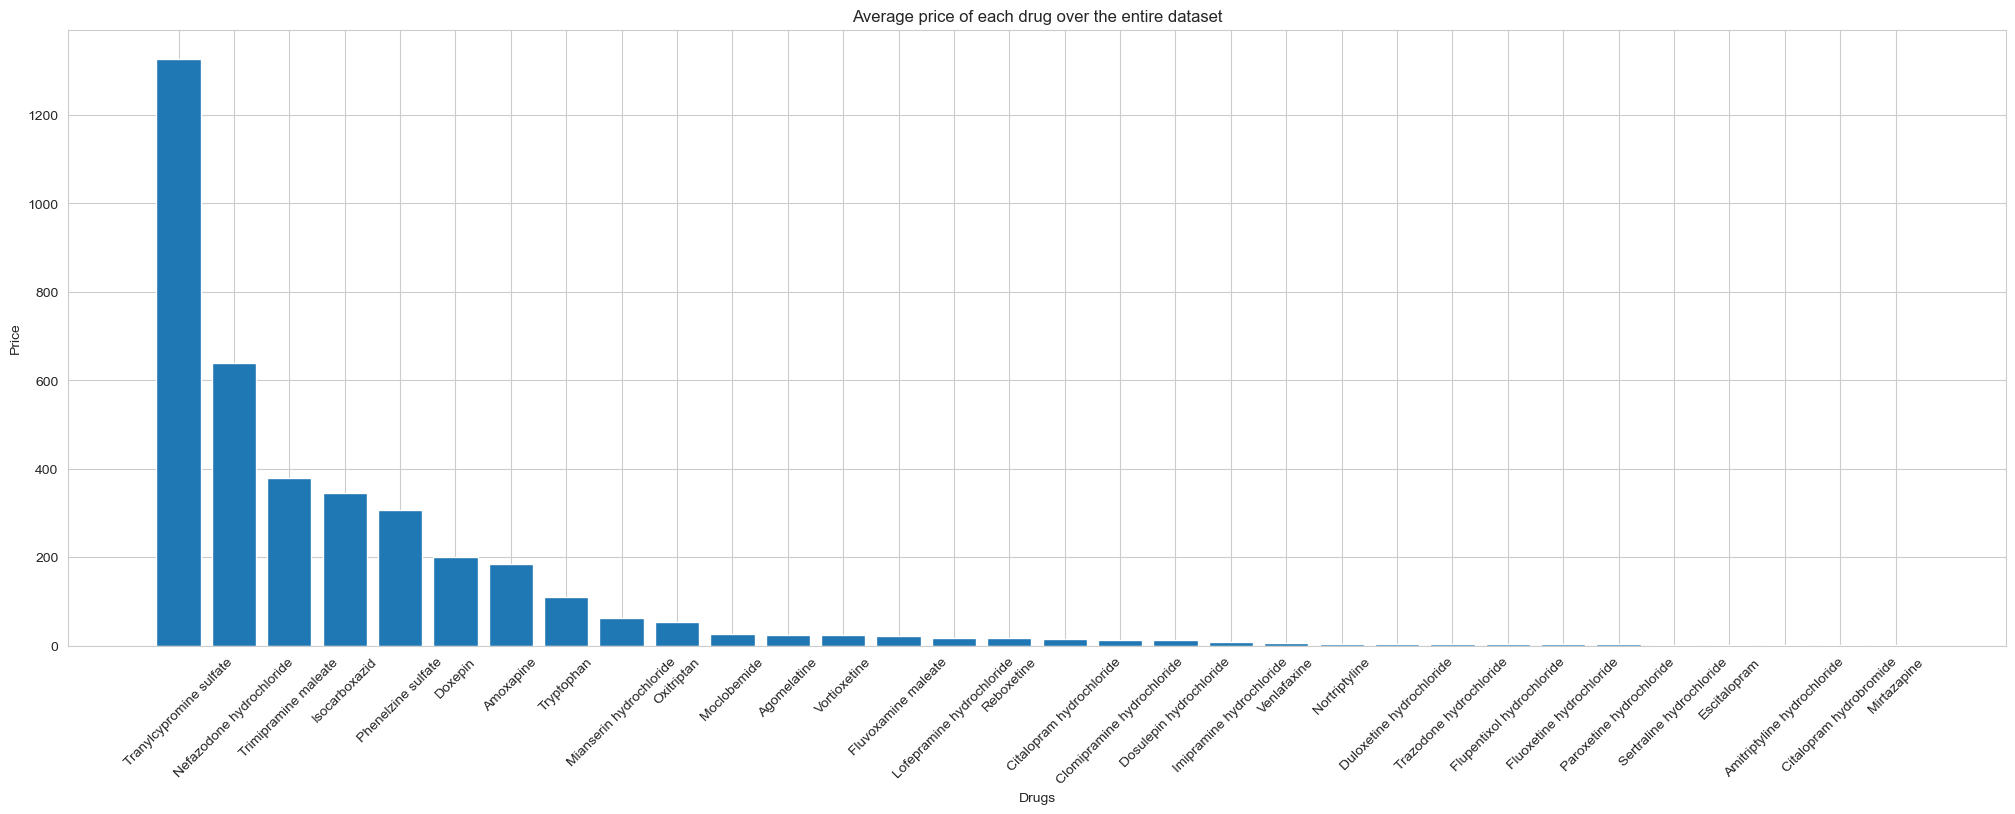

In [47]:
drug_avg_price = []
for drug in drugs:
    total_cost = df_cost_monthwise[drug].sum()
    total_items = df_items_monthwise[drug].sum()
    drug_avg_price.append((drug, total_cost/total_items))

drug_avg_price = sorted(drug_avg_price, key = lambda x: x[1], reverse=True)
plt.figure(figsize = (25,8))
plt.bar(np.arange(len(drugs)), [x[1] for x in drug_avg_price])
plt.xticks(np.arange(len(drugs)), [x[0] for x in drug_avg_price], rotation = 45)
plt.xlabel("Drugs")
plt.ylabel("Price")
plt.title("Average price of each drug over the entire dataset")
plt.show()

In [48]:
top_5_costliest = [x[0] for x in drug_avg_price[:5]]
top_5_cheapest = [x[0] for x in drug_avg_price[-5:]]

print(f"The top-5 most costliest anti-depressant drugs are: \n {top_5_costliest}")
print()
print(f"The top-5 cheapest anti-depressant drugs are: \n {top_5_cheapest}")

The top-5 most costliest anti-depressant drugs are: 
 ['Tranylcypromine sulfate', 'Nefazodone hydrochloride', 'Trimipramine maleate', 'Isocarboxazid', 'Phenelzine sulfate']

The top-5 cheapest anti-depressant drugs are: 
 ['Sertraline hydrochloride', 'Escitalopram', 'Amitriptyline hydrochloride', 'Citalopram hydrobromide', 'Mirtazapine']


In [49]:
topx = 5  # variable to take top x items as leading (can take value from 1 to 32)

topx_cost = df_cost.iloc[:topx, 0].values
topx_items = df_items.iloc[:topx, 0].values

df_topx_cost = {}
df_topx_items = {}

df_topx_cost["others"] = np.zeros(len(year_month))
df_topx_items["others"] = np.zeros(len(year_month))

for drug in df_cost_monthwise.columns.values:
    if drug in topx_cost:
        df_topx_cost[drug] = df_cost_monthwise[drug]
    else:
        df_topx_cost["others"] += df_cost_monthwise[drug]


for drug in df_items_monthwise.columns.values:
    if drug in topx_items:
        df_topx_items[drug] = df_items_monthwise[drug]
    else:
        df_topx_items["others"] += df_items_monthwise[drug]


df_topx_items = pd.DataFrame(df_topx_items)
df_topx_cost = pd.DataFrame(df_topx_cost)


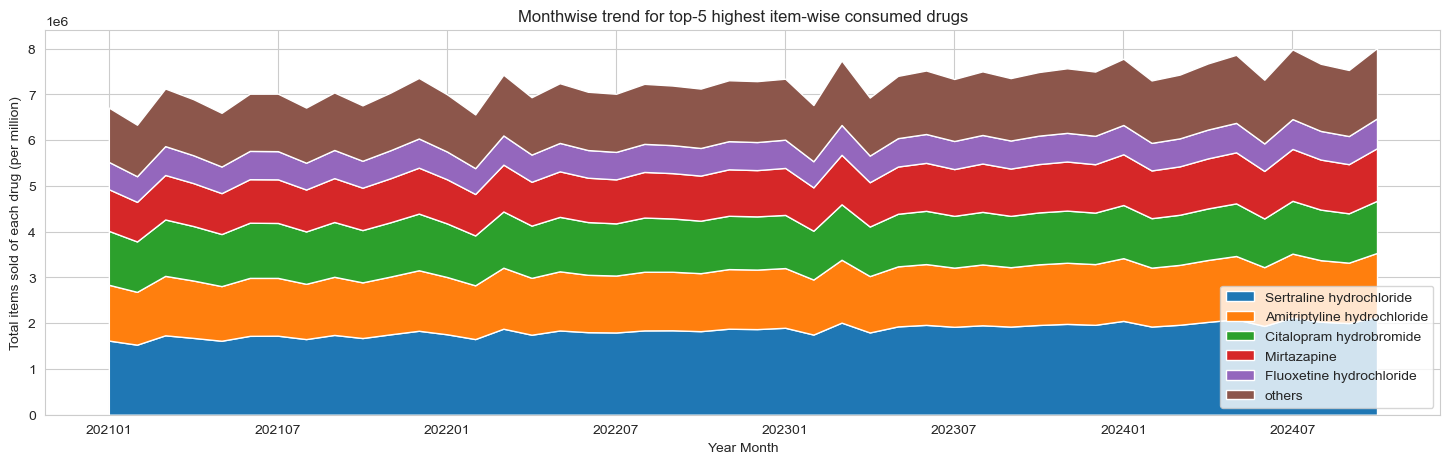

In [50]:
topx_cost_others = list(topx_cost.copy())
topx_cost_others.append("others")

topx_items_others = list(topx_items.copy())
topx_items_others.append("others")

# stackplot for top5_items drugs
plt.figure(figsize = (18,5))
plt.stackplot(np.arange(len(year_month)), [df_topx_items.loc[:, c].values for c in topx_items_others], labels=topx_items_others)
plt.legend()
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.xlabel("Year Month")
plt.ylabel("Total items sold of each drug (per million)")
plt.title("Monthwise trend for top-5 highest item-wise consumed drugs")
plt.show()

From the above chart, we can see that the top-3 drugs being sold item-wise ('Sertraline hydrochloride', 'Amitriptyline hydrochloride', and 'Citalopram hydrobromide') contribute to more than 50% of the total drugs sold item-wise. Therefore, the variation in the number of items sold for these drugs highly affects the changes in the overall trend and therefore we can say that they drive the overall trend.

On comparing with the bar chart showing the average cost of drugs that we compiled earlier, we can see that the top-5 most sold drugs are some of the cheapest drugs available. For example, Sertraline hydrochloride is the fifth cheapest drug, and Amitriptyline hydrochloride is the third cheapest drug. From this, we can conclude that a majority of the drugs which are being sold are comparatively cheaper. This is a good stat to know.

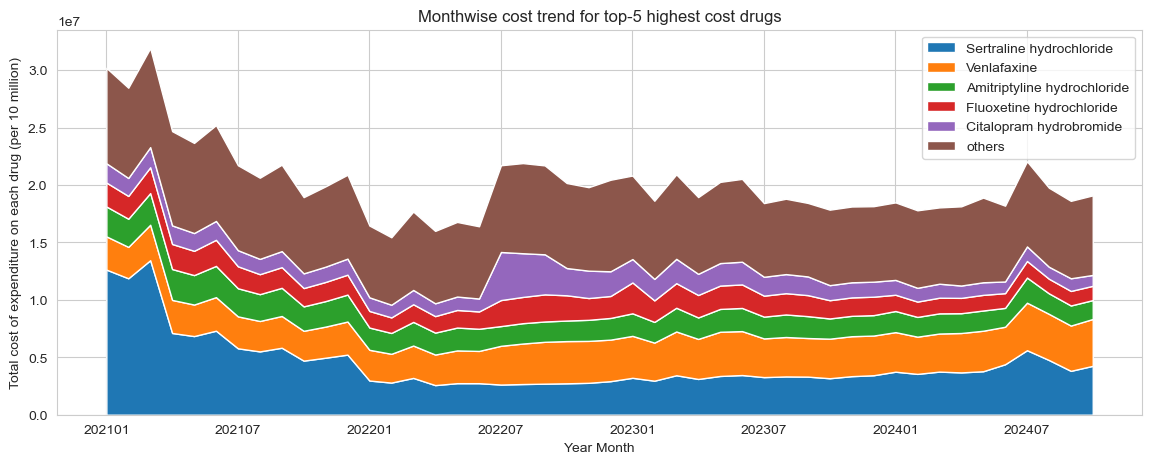

In [51]:
# stackplot for top5_cost drugs
plt.figure(figsize = (14,5))
plt.stackplot(np.arange(len(year_month)), [df_topx_cost.loc[:, c].values for c in topx_cost_others], labels=topx_cost_others)
plt.legend()
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.xlabel("Year Month")
plt.ylabel("Total cost of expenditure on each drug (per 10 million)")
plt.title("Monthwise cost trend for top-5 highest cost drugs")
plt.show()

From this chart, we can see that cost-wise, the top-3 drugs contribute to more than 50% of the prescription cost of total drugs being sold. Therefore, we can say that the top-3 drugs are the drivers of the overall trend for prescription cost on these drugs.

Also, similar to the top-5 most sold drugs item-wise, these drugs are also comparatively much cheaper than other durgs. Therefore, we can say that the reason for these drugs to have such huge prescription cost is not due to their high price, but due to their high volumes being sold.

On combining the observations from the above two stacked plots with price trends for the top-5 most sold drugs item-wise (chart reproduced below), we can explain some of the trends that we observe:

1. The decrease in the total cost from Jan 2021 to Jan 2022 is mainly due to the decrease in the price of Sertraline hydrochloride. This is obvious from the significant decline in the cost of Sertraline hydrochloride as observed from the chart below.

2. The jump in the total cost around July 2022 is mainly due to the sudden increase in the price of Citalopram hydrobromide and Fluoxetine hydrochloride drugs. These drugs are in the top-5 most sold drugs item-wise and an increase in their price is bound to increase the total prescription cost of drugs.

3. Similarly to previous point, the peak in overall prescription cost on drugs during July 2024 is mainly due to a sudden increase in the average price of Sertraline hydrochloride.

PS: Venlafaxine is the sixth most sold drug item-wise

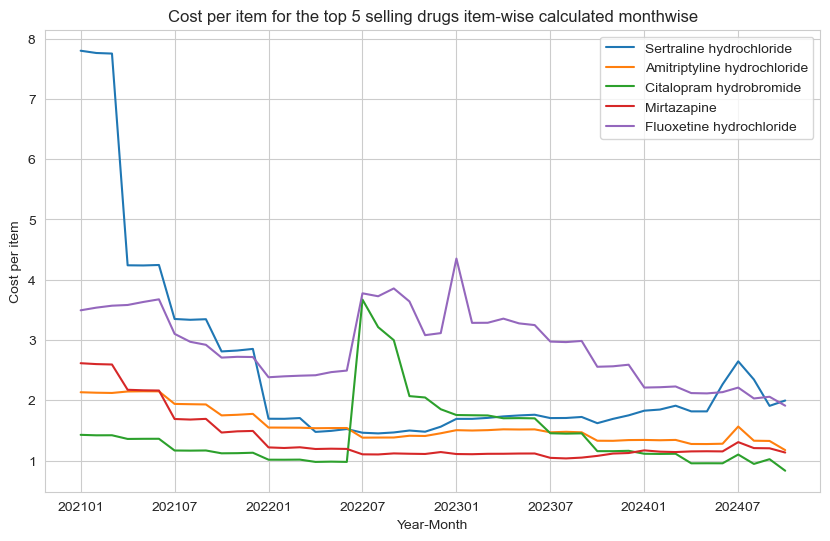

In [52]:
# Reproducing cost per item trend for the top-5 selling drugs

plt.figure(figsize=(10,6))
for drug in top_10_drugs_items[:5]:
    plt.plot(np.arange(len(drug_cpi[drug])), drug_cpi[drug], label = drug)
plt.xlabel("Year-Month")
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.ylabel("Cost per item")
plt.title("Cost per item for the top 5 selling drugs item-wise calculated monthwise")
plt.legend()
plt.show()

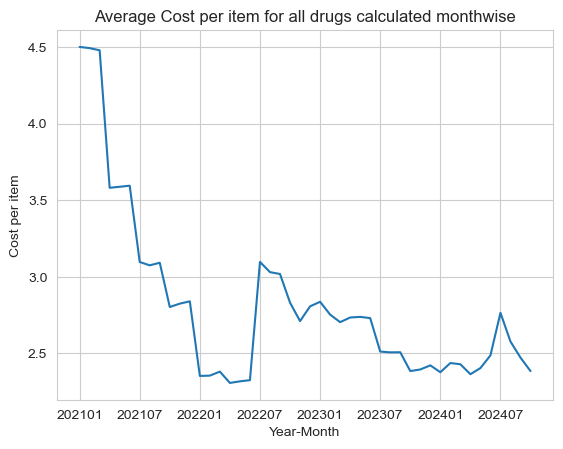

In [53]:
cpi_trend = df_cost_monthwise.sum(axis = 1).values/df_items_monthwise.sum(axis = 1).values
plt.plot(cpi_trend)
plt.xlabel("Year-Month")
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.ylabel("Cost per item")
plt.title("Average Cost per item for all drugs calculated monthwise")
plt.show()

#### Summary

•	Sales Volume & Pricing: The top-3 most sold drugs (‘Sertraline hydrochloride’, ‘Amitriptyline hydrochloride’, ‘Citalopram hydrobromide’) account for over 50% of total sales, indicating that overall market trends are largely driven by their sales fluctuations.

•	Prescription Cost Drivers: Despite being inexpensive, these high-volume drugs contribute significantly to total prescription costs, meaning prescription cost trends are volume-driven rather than price-driven.

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



#### We will focus on Sertraline hydrochloride as it is the most sold drug item-wise.

### 2.E.1 Calculating percentage of Sertraline hydrochloride item wise and cost wise with respect to the rest of the drugs

In [54]:
sh_cost_percent = df_cost_monthwise.loc[:, "Sertraline hydrochloride"]/df_cost_monthwise.sum(axis=1)*100
sh_items_percent = df_items_monthwise.loc[:, "Sertraline hydrochloride"]/df_items_monthwise.sum(axis=1)*100

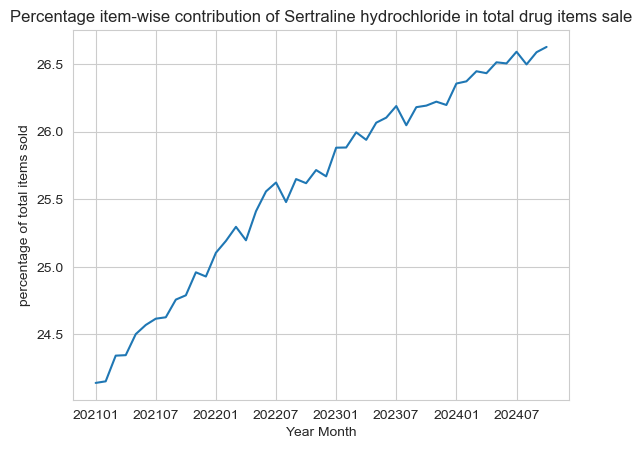

In [55]:
plt.plot(np.arange(len(year_month)), sh_items_percent)
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.xlabel("Year Month")
plt.ylabel("percentage of total items sold")
plt.title("Percentage item-wise contribution of Sertraline hydrochloride in total drug items sale")
plt.show()

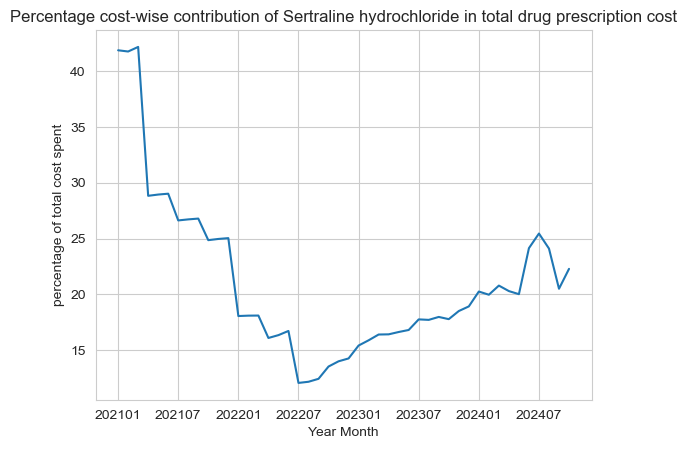

In [56]:
plt.plot(np.arange(len(year_month)), sh_cost_percent)
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.xlabel("Year Month")
plt.ylabel("percentage of total cost spent")
plt.title("Percentage cost-wise contribution of Sertraline hydrochloride in total drug prescription cost")
plt.show()

The item wise percentage contribution of Sertraline hydrochloride has a clear increasing trend, showing that it's remained the most prescribed drug throughout the entire time period. Therefore, it is safe to say that the variation in the prescription cost-wise contribution of Sertraline hydrochloride is due to changes in the price of Sertraline hydrochloride. When the price of Sertraline hydrochloride decreases, it's contribution to the total prescription cost also decreases, and vice-versa.

### 2.E.2 Mean cost per item for Sertraline hydrochloride

In [57]:
drug_avg_price_dict = dict(drug_avg_price)
drug_avg_price_dict["Sertraline hydrochloride"]

2.4080509913023245

Therefore, the average price of Sertraline hydrochloride over the entire time-period is 2.408 per item.

### 2.E.3. Distribution of mean price per item for Sertraline hydrochloride calculated month-wise

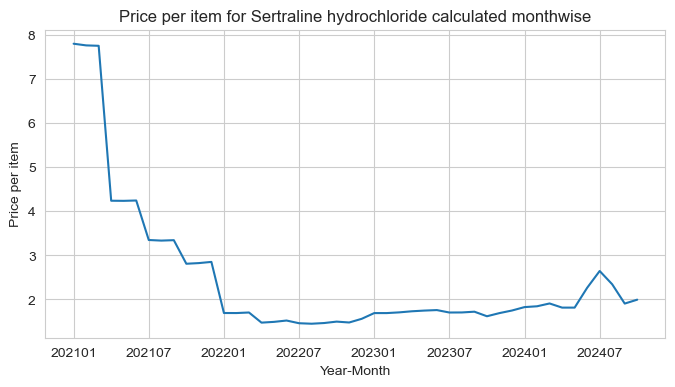

In [58]:
plt.figure(figsize=(8,4))
for drug in top_10_drugs_items[:1]:
    plt.plot(np.arange(len(drug_cpi[drug])), drug_cpi[drug], label = drug)
plt.xlabel("Year-Month")
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.ylabel("Price per item")
plt.title("Price per item for Sertraline hydrochloride calculated monthwise")
plt.show()

The price per item of Sertraline hydrochloride shows an overall decreasing trend. This means that the average price of Sertraline hydrochloride has been decreasing over the given time-period from Jan 2021 to Oct 2024. This is a good thing since it's the most sold drug.

### 2.E.4 Doing a region-wise analysis of average price of Sertraline hydrochloride

In [59]:
df_sh = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride"]
df_sh["CPI"] = df_sh["COST"]/df_sh["ITEMS"]
df_sh_pivot = df_sh.pivot_table(columns = "REGION_NAME", index="YEAR_MONTH", values="CPI")
df_sh_pivot.head()

/var/folders/kc/21_s74b16zb4sw3qkmrlmhlc0000gn/T/ipykernel_46279/1532919995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sh["CPI"] = df_sh["COST"]/df_sh["ITEMS"]


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR_MONTH,,,,,,,
202101,7.492205,7.997760,7.949080,7.285297,7.537162,8.685040,8.045843
202102,7.461686,7.960261,7.912556,7.263215,7.497204,8.620138,8.008023
202103,7.455704,7.991651,7.900519,7.267504,7.475373,8.583618,7.990149
202104,4.089667,4.369836,4.315078,3.943930,4.047861,4.760882,4.409378
202105,4.079355,4.376372,4.311253,3.935127,4.060490,4.744672,4.398856


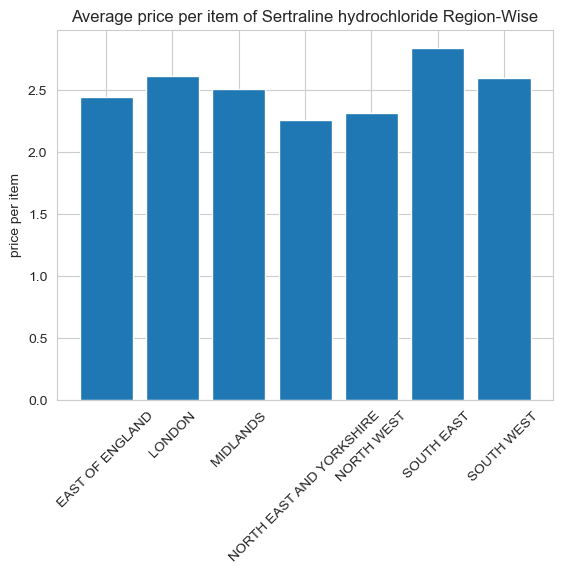

In [60]:
avg_cpi_sh_regionwise = df_sh_pivot.describe().loc["mean", :]
plt.bar(np.arange(len(avg_cpi_sh_regionwise)), avg_cpi_sh_regionwise.values)
plt.xticks(np.arange(len(avg_cpi_sh_regionwise)), df_sh_pivot.columns, rotation = 45)
plt.ylabel("price per item")
plt.title("Average price per item of Sertraline hydrochloride Region-Wise")
plt.show()

From the above bar-chart, we can see that the average price of Sertraline hydrochloride per item over the entire time period is highest in the South East region and lowest in the North East and Yorkshire region. The reason for this difference in price can be further analysed, considering that Sertraline hydrochloride is a highly prescribed drug.

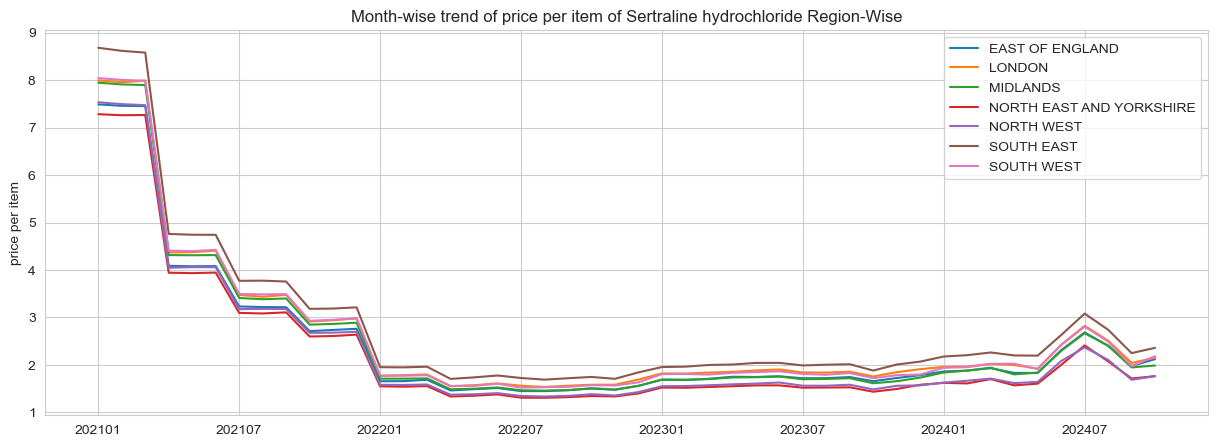

In [61]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(year_month)), df_sh_pivot, label = df_sh_pivot.columns)
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.ylabel("price per item")
plt.title("Month-wise trend of price per item of Sertraline hydrochloride Region-Wise")
plt.legend()
plt.show()

The variation in average price per item of Sertraline hydrochloride calculated month-wise for different regions. This trend shows that even though there is a difference in the price of Sertraline hydrochloride in different regions, it's price in different regions follows a similar trend over time, indicating that they are all affected by common factors.

### 2.E.5. Forecasting


Now, we will try to forecast the items being sold for Sertraline hydrochloride anti-depressant drug for the next 4 months using linear regression. We will use sklearn library for implementing linear regression.

In [62]:
sh_items_monthwise = df_items_monthwise.loc[:, "Sertraline hydrochloride"].values

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(np.arange(len(year_month)).reshape(-1, 1), sh_items_monthwise)

LinearRegression()

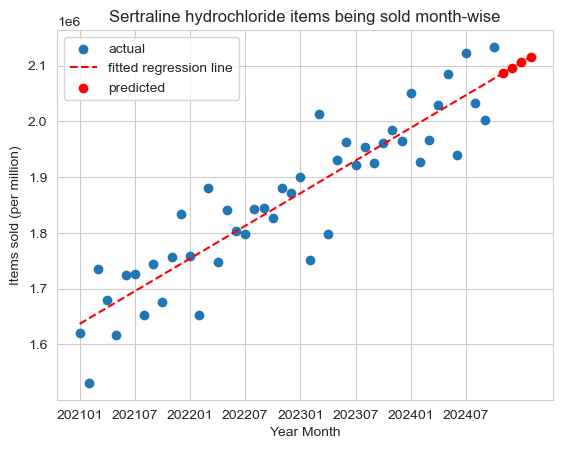

In [63]:
plt.scatter(np.arange(len(year_month)), sh_items_monthwise, label = "actual")
plt.plot(np.arange(len(year_month)+4), linreg.coef_*np.arange(len(year_month)+4) + linreg.intercept_, linestyle = "--", color = "red", label = "fitted regression line")
plt.scatter(np.arange(len(year_month), len(year_month)+4), linreg.coef_*np.arange(len(year_month), len(year_month)+4) + linreg.intercept_, color = "red", label = "predicted")
plt.title("Sertraline hydrochloride items being sold month-wise")
plt.xticks(np.arange(len(year_month))[::6], year_month[::6])
plt.xlabel("Year Month")
plt.ylabel("Items sold (per million)")
plt.legend()
plt.show()

### 2.E.6. Summary


Key insights include:

•	Consistent Dominance: Sertraline hydrochloride’s percentage contribution to total prescriptions has steadily increased, reinforcing its role as the most widely used antidepressant.

•	Price Trends: The drug’s price per item has shown a consistent decline from Jan 2021 to Oct 2024, which is beneficial given its high prescription volume. The overall average price per item across the period is 2.408.

•	Regional Price Variation: Prices are highest in the South East and lowest in North East and Yorkshire, suggesting potential regional pricing factors worth further investigation.

•	Common Price Trends Across Regions: Despite regional price variations, all regions exhibit a similar price trend over time, indicating that common external factors influence pricing across different areas.